In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

conn = sqlite3.connect('lahman.sqlite')

query = "SELECT * FROM sqlite_master;"

df_schema = pd.read_sql_query(query, conn)

df_schema.tbl_name.unique()

array(['allstarfull', 'appearances', 'awardsmanagers', 'awardsplayers',
       'awardssharemanagers', 'awardsshareplayers', 'batting',
       'battingpost', 'collegeplaying', 'divisions', 'fielding',
       'fieldingof', 'fieldingofsplit', 'fieldingpost', 'halloffame',
       'homegames', 'leagues', 'managers', 'managershalf', 'parks',
       'people', 'pitching', 'pitchingpost', 'salaries', 'schools',
       'seriespost', 'teams', 'teamsfranchises', 'teamshalf'],
      dtype=object)

## Question 1

In [6]:
query1 = """
SELECT yearID, teamID, SUM(salary) as TotalSalaries
FROM salaries
GROUP BY yearID, teamID;
"""
df1 = pd.read_sql_query(query1, conn)
df1

,yearID,teamID,TotalSalaries
0,1985,ATL,14807000.0
1,1985,BAL,11560712.0
2,1985,BOS,10897560.0
3,1985,CAL,14427894.0
4,1985,CHA,9846178.0
...,...,...,...
913,2016,SLN,143053500.0
914,2016,TBA,57097310.0
915,2016,TEX,176038723.0
916,2016,TOR,138701700.0


## Question 2 

In [7]:
query2 ="""
SELECT playerID, MIN(yearID) as firstYear, MAX(yearID) as LastYear
FROM fielding
GROUP BY playerID

"""
df2 = pd.read_sql_query(query2, conn)
df2

,playerID,firstYear,LastYear
0,aardsda01,2004,2015
1,aaronha01,1954,1976
2,aaronto01,1962,1971
3,aasedo01,1977,1990
4,abadan01,2001,2003
...,...,...,...
19486,zupofr01,1957,1961
19487,zuvelpa01,1982,1991
19488,zuverge01,1951,1959
19489,zwilldu01,1910,1916


## Question 3 

In [9]:
query3 ="""
SELECT playerID, COUNT(gameID) as numAllstars
FROM allstarfull
GROUP BY playerID
ORDER BY numAllStars DESC

"""
df3 = pd.read_sql_query(query3, conn)
df3

,playerID,numAllstars
0,aaronha01,24
1,mayswi01,24
2,musiast01,24
3,mantlmi01,19
4,ripkeca01,19
...,...,...
1862,mayoed01,0
1863,odeake01,0
1864,rosengo01,0
1865,treshmi01,0


## Question 4 

In [38]:
query4 ="""
SELECT schoolID, count(DISTINCT playerID) as distPlayers
FROM collegeplaying
GROUP BY schoolID
ORDER BY distPlayers DESC
"""
df4 = pd.read_sql_query(query4, conn)
df4

,schoolID,distPlayers
0,texas,107
1,usc,105
2,arizonast,101
3,stanford,86
4,michigan,76
...,...,...
1029,wlmjewell,1
1030,woosteroh,1
1031,wpaterson,1
1032,wvpotom,1


## Question 5

In [17]:
query5 ="""
SELECT playerID, Cast((JulianDay(finalgame_date)-JulianDay(debut_date)) as Float)/365 AS careerLength
FROM people
"""
df5 = pd.read_sql_query(query5, conn)
df5

,playerID,careerLength
0,aardsda01,11.386301
1,aaronha01,22.490411
2,aaronto01,9.468493
3,aasedo01,13.197260
4,abadan01,4.591781
...,...,...
19873,zupofr01,3.857534
19874,zuvelpa01,8.663014
19875,zuverge01,8.156164
19876,zwilldu01,5.915068


## Question 6

In [62]:
query6 ="""
SELECT Cast(strftime('%m', debut)AS Integer) AS Month, COUNT(*) as numDebuts
FROM people
GROUP BY Month
"""
df6 = pd.read_sql_query(query6, conn)
df6

,Month,numDebuts
0,NaN,196
1,3.0,92
2,4.0,4998
3,5.0,2457
4,6.0,2155
5,7.0,2156
6,8.0,2180
7,9.0,5336
8,10.0,308


<BarContainer object of 8 artists>

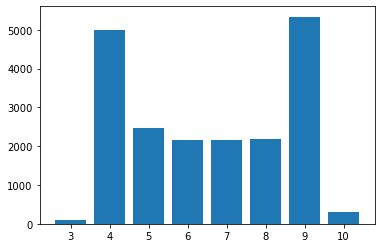

In [66]:
plt.bar(df6['Month'][1:],df6['numDebuts'][1:])

## Question 7 

In [67]:
q = "SELECT * FROM people"
df = pd.read_sql_query(q, conn)
df

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,bats,throws,debut,finalGame,retroID,bbrefID,birth_date,debut_date,finalgame_date,death_date
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,1981-12-27,2004-04-06,2015-08-23,None
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01,1934-02-05,1954-04-13,1976-10-03,None
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,R,R,1962-04-10,1971-09-26,aarot101,aaronto01,1939-08-05,1962-04-10,1971-09-26,1984-08-16
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,R,R,1977-07-26,1990-10-03,aased001,aasedo01,1954-09-08,1977-07-26,1990-10-03,None
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,L,L,2001-09-10,2006-04-13,abada001,abadan01,1972-08-25,2001-09-10,2006-04-13,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19873,zupofr01,1939.0,8.0,29.0,USA,CA,San Francisco,2005.0,3.0,25.0,...,L,R,1957-07-01,1961-05-09,zupof101,zupofr01,1939-08-29,1957-07-01,1961-05-09,2005-03-25
19874,zuvelpa01,1958.0,10.0,31.0,USA,CA,San Mateo,NaN,NaN,NaN,...,R,R,1982-09-04,1991-05-02,zuvep001,zuvelpa01,1958-10-31,1982-09-04,1991-05-02,None
19875,zuverge01,1924.0,8.0,20.0,USA,MI,Holland,2014.0,9.0,8.0,...,R,R,1951-04-21,1959-06-15,zuveg101,zuverge01,1924-08-20,1951-04-21,1959-06-15,2014-09-08
19876,zwilldu01,1888.0,11.0,2.0,USA,MO,St. Louis,1978.0,3.0,27.0,...,L,L,1910-08-14,1916-07-12,zwild101,zwilldu01,1888-11-02,1910-08-14,1916-07-12,1978-03-27


In [68]:
q = "SELECT * FROM salaries"
df = pd.read_sql_query(q, conn)
df

,ID,yearID,teamID,team_ID,lgID,playerID,salary
0,1,1985,ATL,1918,NL,barkele01,870000.0
1,2,1985,ATL,1918,NL,bedrost01,550000.0
2,3,1985,ATL,1918,NL,benedbr01,545000.0
3,4,1985,ATL,1918,NL,campri01,633333.0
4,5,1985,ATL,1918,NL,ceronri01,625000.0
...,...,...,...,...,...,...,...
26423,26424,2016,WAS,2835,NL,strasst01,10400000.0
26424,26425,2016,WAS,2835,NL,taylomi02,524000.0
26425,26426,2016,WAS,2835,NL,treinbl01,524900.0
26426,26427,2016,WAS,2835,NL,werthja01,21733615.0


In [5]:
query7_1 ="""
SELECT AVG(salary)
FROM people LEFT JOIN salaries on people.playerID = salaries.playerID

"""
df7_1 = pd.read_sql_query(query7_1, conn)
df7_1

,AVG(salary)
0,2.085634e+06


In [6]:
query7_2 ="""
SELECT AVG(salary)
FROM salaries LEFT JOIN people ON salaries.playerID = people.playerID

"""
df7_2 = pd.read_sql_query(query7_2, conn)
df7_2

,AVG(salary)
0,2.085634e+06


I suspect these should be different but I can't figure out why they're not.